# Full Data Analysis Project
## E-commerce Analysis

### Importing Libraries  & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Let's Read the File
df = pd.read_csv('Desktop/ecommerce-purchases.csv')

### Data Understand and Checking

In [5]:
# Check the Data
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [7]:
# How many Columns and Rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [9]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Credit Card,10000.0,2.341374e+15,2.256103e+15,6.040186e+10,3.056322e+13,8.699942e+14,4.492298e+15,6.012000e+15
CC Security Code,10000.0,9.070000e+02,1.590000e+03,0.000000e+00,2.800000e+02,5.480000e+02,8.160000e+02,9.993000e+03
Purchase Price,10000.0,5.000000e+01,2.900000e+01,0.000000e+00,2.500000e+01,5.100000e+01,7.600000e+01,1.000000e+02


### Data Wrangling

In [11]:
# Are there any missing values ?
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [13]:
# Are there any Duplicated values ?
df.duplicated().sum()

0

In [15]:
# Check for columns name and change it
df = df.rename(columns={"AM or PM":"am _or_pm",
                   "Browser Info":"browser_info",
                   "Credit Card":"credit_card",
                   "CC Exp Date":"cc_exp_date",
                   "CC Security Code":"cc_security_code",
                   "CC Provider":"cc_provider",
                   "IP Address":"ip_address",
                   "Purchase Price":"purchase_price"})

In [17]:
df.head(1)

,Address,Lot,am _or_pm,browser_info,Company,credit_card,cc_exp_date,cc_security_code,cc_provider,Email,Job,ip_address,Language,purchase_price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14


In [31]:
# Convert the Language to Upper
df["Language"] = df["Language"].str.upper()

## Data Analysis & Visulization

In [21]:
# get the Avg price
df['purchase_price'].mean()

50.347302

In [23]:
# get Max price
df['purchase_price'].max()

99.99

In [25]:
# get Min price
df['purchase_price'].min()

0.0

In [39]:
# How many people use english language
df[df['Language']=="EN"].count()

Address             1098
Lot                 1098
am _or_pm           1098
browser_info        1098
Company             1098
credit_card         1098
cc_exp_date         1098
cc_security_code    1098
cc_provider         1098
Email               1098
Job                 1098
ip_address          1098
Language            1098
purchase_price      1098
dtype: int64

In [47]:
# How many  people have a title of "Lawyer"
df[df['Job'] == 'Lawyer'].count()

Address             30
Lot                 30
am _or_pm           30
browser_info        30
Company             30
credit_card         30
cc_exp_date         30
cc_security_code    30
cc_provider         30
Email               30
Job                 30
ip_address          30
Language            30
purchase_price      30
dtype: int64

In [49]:
# How many people made the purchase during Am and how many for the Pm
df['am _or_pm'].value_counts()

am _or_pm
PM    5068
AM    4932
Name: count, dtype: int64

In [53]:
# What is the most 5 common Job title
df['Job'].value_counts().head(5)

Job
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: count, dtype: int64

In [61]:
# how many people have american express as thier credit and made purchase above 95 USD
df[(df['cc_provider'] == 'American Express') & (df['purchase_price'] > 95)].count()

Address             39
Lot                 39
am _or_pm           39
browser_info        39
Company             39
credit_card         39
cc_exp_date         39
cc_security_code    39
cc_provider         39
Email               39
Job                 39
ip_address          39
Language            39
purchase_price      39
dtype: int64

<Axes: >

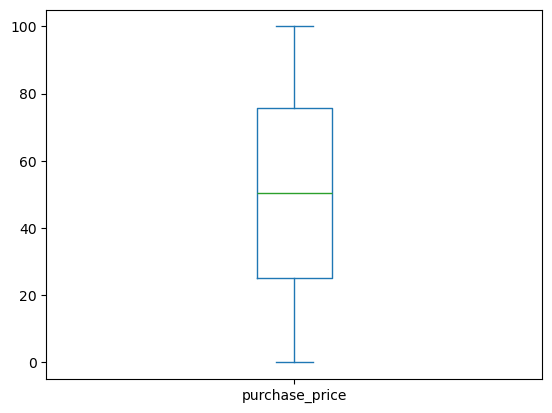

In [65]:
#plot the summary statistics for purchases column
df['purchase_price'].plot.box()